# Linear Stability Analysis for Plane Poiseuille Flow
In this tutorial, we will perform a linear stability analysis of plane Poiseuille flow (PPF). PPF refers to the flow created between two infinitely long parallel plates, separated by a distance of $2L$, with a constant pressure gradient applied in the direction of the flow. We will consider an incompressible, Newtonian fluid.

We will undertake a series of tasks to understand how the linear stability code works.


## Governing equation

Our governing equation in non-dimensional form is as follows:

\begin{equation}
\frac{\partial {\boldsymbol u }}{\partial t}+ {\boldsymbol u} \cdot\nabla {\boldsymbol u}  =  -\nabla p + \frac{1}{Re}{\nabla}^2{\boldsymbol u},
\end{equation}

\begin{equation}
\nabla \cdot \boldsymbol u = 0.
\end{equation}

Here, $Re$ represents the Reynolds number, defined as

\begin{equation}
Re = \frac{UL}{\nu},
\end{equation}

where $\nu$ represents the kinematic viscosity and $U$ is the centerline velocity ($U = u(y=0)$). Note that these equations have been non-dimensionalised using $U$ as the velocity scale and $L$ as the length scale.


## Orr--Sommerfeld Equation
Let us decompose the flow field into the base flow and the perturbation as 

\begin{eqnarray}
{\boldsymbol u}(x,y,z,t) & = &{\boldsymbol U}(y) + {\boldsymbol u}^\prime(x,y,z,t)\\
{p}(x,y,z,t) & = &{P}(y) + {p}^\prime(x,y,z,t).
\end{eqnarray}

Thus, the linearised Navier--Stokes equation takes the following form:

\begin{eqnarray}
\frac{\partial {\boldsymbol u }^\prime}{\partial t}+  {\bf u^\prime} \cdot\nabla {\boldsymbol U} + {\boldsymbol U} \cdot\nabla {\bf u^\prime}  & = & -\nabla p^\prime + Re^{-1}{\nabla}^2{\boldsymbol u}^\prime \label{eq:LNSE_OS}\\ 
\nabla \cdot {\boldsymbol u}^\prime & = 0 \label{eq:LNSE_OS_inc}.
\end{eqnarray}

For parallel flow,

$${\boldsymbol U} = U(y)\hat{\boldsymbol e}_x.$$

Using the above approximation, our governing equation becomes:

$$[(\partial_t + U\partial_x) \nabla^2 - U^{\{2\}}\partial_x]{v}^\prime = Re^{-1}{\nabla}^4{v}^\prime.$$

Since parallel flows are invariant in $\hat{\boldsymbol e}_x$ and $\hat{\boldsymbol e}_z$, we can decompose the flow fields into normal modes as follows:

\begin{eqnarray}
v^\prime(x,y,z,t) & = &\hat{v}(y)\exp[i(\alpha x +\beta z -\omega t)]. \label{eq:v_prime_mode}
\end{eqnarray}

Thus, we obtain the Orr--Sommerfeld equation as:

\begin{equation}
\hat{v}^{\{4\}}-2k^2 \hat{v}^{\{2\}}+k^4\hat{v}= i \alpha Re\left\{(U-c) (\hat{v}^{\{2\}}-k^2\hat{v})- U^{\{2\}} \hat{v}\right\} \label{eq:OS} \tag{1}.
\end{equation}

Here $c=\omega/\alpha$ and $k^2 = \alpha^2 + \beta^2$.

### Base Flow Solution for PPF
Applying the boundary condition $U(y=\pm1)=0$ and using the parallel flow approximation, the base flow takes the following form:

$$U(y) = 1 - y^2.$$

### Boundary Condition on $\hat{v}$.
We have no-slip boundary conditions for the plane Poiseuille flow at $y=\pm1$. Thus,

\begin{equation}
u^\prime=v^\prime=w^\prime=0 \qquad \text{at} \qquad y=\pm 1.
\end{equation}

By using the continuity equation and the no-slip boundary condition, we obtain the following condition on $\hat{v}$:

$$\hat{v}(y) = 0, \qquad \frac{d\hat{v}(y)}{dy} = 0 \qquad \text{at} \qquad y=\pm1.$$

## Numerical Methodology
We discretise the equations using the spectral collocation method with Chebyshev polynomials (see Trefethen, 2000 for more details). This yields a generalised matrix eigenvalue problem of the form:

\begin{equation}
{\bf A}\hat{v}=\omega {\bf B}\hat{v}.
\end{equation}

Now, we can represent the Orr--Sommerfeld equation in terms of the above equation, in which case we have:

$${\bf A} = \frac{i}{Re}[D^4-2k^2 D^2+k^4 I] +\alpha U(D^2-k^2 I) - \alpha U^{\{2\}}I,$$

and 

$${\bf B} = D^2-k^2 I.$$

Here, $D$ denotes the Chebyshev differentiation matrix. 

## Task 1
In this first task, we will perform a convergence test on the order of the Chebyshev polynomial \(N\). We will compare our results with Table 3 of Orszag (1971). The parameters for this case are $Re=10^4$, $\alpha = 1$, and $\beta = 0$.

In [1]:
from LSA_OS import *

In [2]:
lsa_OS = stability_analysis(1e4, 20 , 1, 0)
Cheb_polynomial_order = np.arange(20,65,5)
print("N\t omega \t\t sigma \n")
for i in range(0,len(Cheb_polynomial_order)):
    lsa_OS.N = Cheb_polynomial_order[i]
    omega, sigma  = lsa_OS.get_most_unstable_eigenvalue()
    print(("%d \t %0.8f \t %0.8f \n")%(Cheb_polynomial_order[i],omega,sigma))

N	 omega 		 sigma 

20 	 0.23879009 	 0.00630869 

25 	 0.23818047 	 0.00415343 

30 	 0.23763053 	 0.00380254 

35 	 0.23753592 	 0.00375020 

40 	 0.23752655 	 0.00374080 

45 	 0.23752643 	 0.00373971 

50 	 0.23752649 	 0.00373967 

55 	 0.23752649 	 0.00373967 

60 	 0.23752649 	 0.00373967 



Parameters of "stability_analysis" are ($Re$, $N$, $\alpha$, $\beta$). 

## Task 2
In this second task, we will compute the critical Reynolds number $Re_c$ for the PPF. The result of Orszag (1971) yields $Re_c = 5772.22$ with the corresponding critical wavenumber $\alpha_c = 1.02056$. We will fix $N = 60$ for this calculation.

We will perform this task in two steps. First, we will plot the marginal stability curve. We will vary $Re$ from $5 \times 10^3$ to $6 \times 10^3$ in steps of 50 and $\alpha$ from 0.96 to 1.06 in steps of 0.001.

In [3]:
from scipy.interpolate import splrep, splev

lsa_OS = stability_analysis(5e3, 60 , 1, 0)
Re = np.arange(5000, 6000, 50)
alpha = np.arange(1.0, 1.04+0.001, 0.001)
Re_alpha = np.zeros(len(alpha))
for i in range(0,len(alpha)):
    sigma_data = np.zeros(len(Re))
    for j in range(0,len(Re)):
        lsa_OS.alpha = alpha[i]
        lsa_OS.Re = Re[j]
        omega, sigma  = lsa_OS.get_most_unstable_eigenvalue()
        sigma_data[j] = sigma
    A = splrep(sigma_data, Re, k=3)
    Re_alpha[i] = splev(0,A)
    print("alpha = %.3f"%(alpha[i]))

alpha = 1.000
alpha = 1.001
alpha = 1.002
alpha = 1.003
alpha = 1.004
alpha = 1.005
alpha = 1.006
alpha = 1.007
alpha = 1.008
alpha = 1.009
alpha = 1.010
alpha = 1.011
alpha = 1.012
alpha = 1.013
alpha = 1.014
alpha = 1.015
alpha = 1.016
alpha = 1.017
alpha = 1.018
alpha = 1.019
alpha = 1.020
alpha = 1.021
alpha = 1.022
alpha = 1.023
alpha = 1.024
alpha = 1.025
alpha = 1.026
alpha = 1.027
alpha = 1.028
alpha = 1.029
alpha = 1.030
alpha = 1.031
alpha = 1.032
alpha = 1.033
alpha = 1.034
alpha = 1.035
alpha = 1.036
alpha = 1.037
alpha = 1.038
alpha = 1.039
alpha = 1.040


Text(0, 0.5, '$\\alpha$')

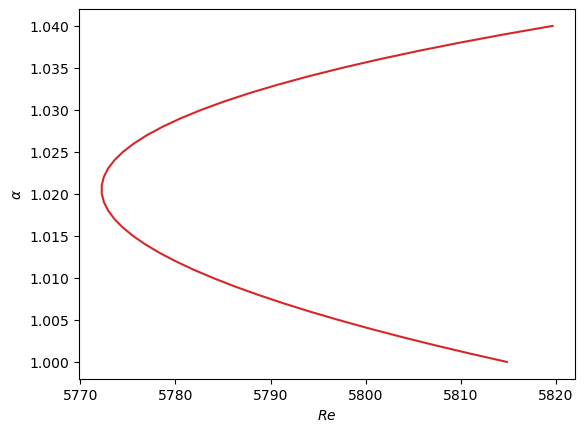

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Re_alpha, alpha, "C3")
plt.xlabel(r"$Re$")
plt.ylabel(r"$\alpha$")

From the above data, we can estimate the minimum value of $Re$, which corresponds to the critical Reynolds number. We can find this minimum by taking the derivative of $Re$ with respect to $\alpha$ and then estimating $Re_c$ and $\alpha_c$. Below is the code for this purpose.

In [5]:
A = splrep(alpha, Re_alpha, k=3)
dRe_by_dalpha = splev(alpha,A,der=1)
B = splrep(dRe_by_dalpha,alpha)
alpha_critical = splev(0,B)
Re_critical = splev(alpha_critical,A)
print("Re_c = %.2f"%(Re_critical))
print("alpha_c = %.5f"%(alpha_critical))

Re_c = 5772.22
alpha_c = 1.02055


Our results match well with those of Orszag (1978). We can also mark $Re_c$ and $\alpha_c$ on the marginal stability curve.

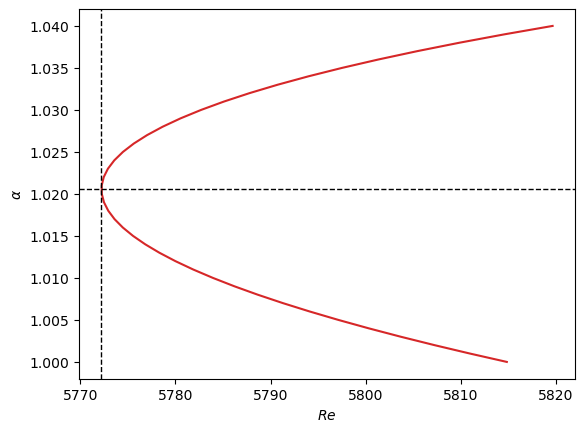

In [6]:
plt.plot(Re_alpha, alpha, "C3")
plt.xlabel(r"$Re$")
plt.ylabel(r"$\alpha$")
plt.axvline(Re_critical ,color='k',ls="--",lw=1)
plt.axhline(alpha_critical ,color='k',ls="--",lw=1)
#axes.plot(Re_alpha, alpha, "C3")
#plt.show()

## Task 3
In this final task, we will compute the eigenvalue spectrum and the shape of the unstable mode in the physical space for $Re=10^4$, $\alpha = 1$, and $\beta = 0$. We will compare our results with those of Juniper et al. (2014). 

(a) Eigenvalue spectrum

In [7]:
Re = 1e4
alpha = 1
lsa_OS = stability_analysis(Re, 200 , alpha, 0)
eigval,eigvec = lsa_OS.eig_value()

In [8]:
omega = np.real(eigval)
sigma = np.imag(eigval)
sigma_sort = []
omega_sort = []
sort_index = np.argsort(sigma)[::-1]#[:100]
for i in range(0,len(sort_index)):
    sigma_sort.append(sigma[sort_index[i]])
    omega_sort.append(omega[sort_index[i]])

(0.0, 1.0)

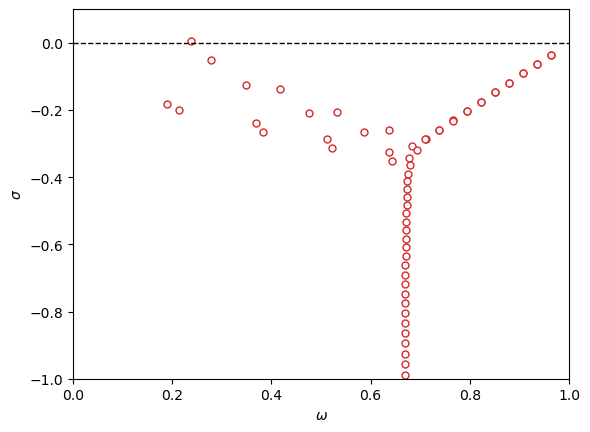

In [9]:
plt.plot(omega_sort,sigma_sort,'C3o',mfc='white',ms=5)
plt.axhline(0 ,color='k',ls="--",lw=1)
plt.ylabel(r'$\sigma$')
plt.xlabel(r'$\omega$')
plt.ylim(-1,0.1)
plt.xlim(0,1)

The result is identical to Fig. 10 of Juniper et al. (2014).

(b) Plot of the unstable eigenmode. 

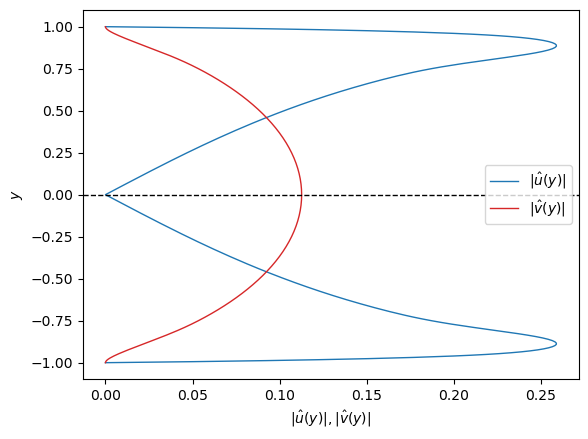

In [10]:
D,y = lsa_OS.cheb()
max_index = np.argmax(np.imag(eigval))
v_interior = eigvec[:,max_index]
v = np.insert(v_interior, [0, len(v_interior)], [0, 0])
u = lsa_OS.get_u_for_2D(v)

plt.plot(np.abs(u),y,'C0',lw=1,label=r"$|\hat{u}(y)|$")
plt.plot(np.abs(v),y,'C3',lw=1,label=r"$|\hat{v}(y)|$")
plt.axhline(0 ,color='k',ls="--",lw=1)
plt.ylabel(r'$y$')
plt.xlabel(r'$|\hat{u}(y)|,|\hat{v}(y)|$')
plt.ylim(-1.1,1.1)
plt.legend()

The above plot is similar to Fig. 11 of Juniper et al. (2013).

Next, we will plot $|\hat{\bf u}(y)|$.

(-1.1, 1.1)

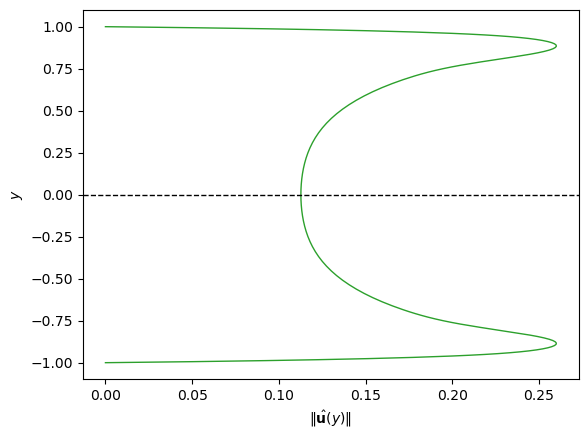

In [11]:
modulus_vec_u = np.sqrt((np.real(u)**2) + (np.imag(u)**2) + (np.real(v)**2) + (np.imag(v)**2))
plt.plot(modulus_vec_u,y,'C2',lw=1)
plt.axhline(0 ,color='k',ls="--",lw=1)
plt.ylabel(r'$y$')
plt.xlabel(r'$\| \hat{\bf u}(y)\|$')
plt.ylim(-1.1,1.1)

We can also plot the unstable Tollmien–Schlichting mode in the physical space.

In [12]:
M = len(y)
Lx = (4*np.pi)/alpha
u_phy = np.zeros([M,M])
v_phy = np.zeros([M,M])
x = np.linspace(0, Lx, M)
xv,yv = np.meshgrid(x,y)
for i in range(0,M):
    v_phy[:,i] = np.real(v)*np.cos(alpha*x[i])-  np.imag(v)*np.sin(alpha*x[i])
    u_phy[:,i] = np.real(u)*np.cos(alpha*x[i])-  np.imag(u)*np.sin(alpha*x[i])

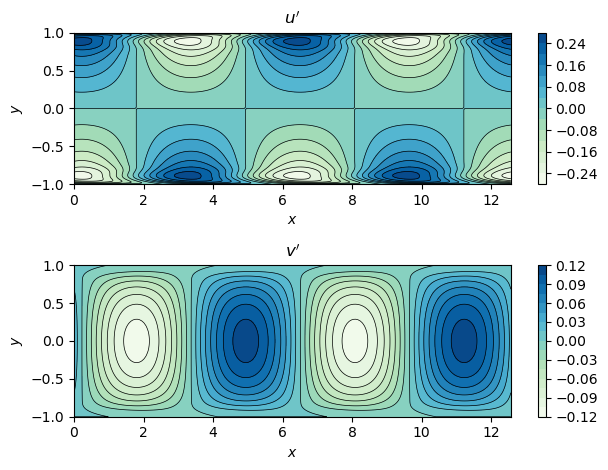

In [13]:
import matplotlib.cm as cm
plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, axes = plt.subplots(2,1)
cf1 = axes[0].contourf(xv,yv,u_phy,15,cmap=cm.GnBu)
axes[0].contour(xv,yv,u_phy,15,colors="k",linewidths=0.5)
cf2 = axes[1].contourf(xv,yv,v_phy,15,cmap=cm.GnBu)
axes[1].contour(xv,yv,v_phy,15,colors="k",linewidths=0.5)
axes[0].set_title(r'$u^\prime$')
axes[1].set_title(r'$v^\prime$')
fig.colorbar(cf1,ax=axes[0])
fig.colorbar(cf2,ax=axes[1])
axes[0].set_xlabel(r'$x$')
axes[1].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$y$')
axes[1].set_ylabel(r'$y$')
fig.tight_layout()
plt.show()

## References

Juniper, M. P., A. Hanifi, and V. Theofilis, “Modal Stability TheoryLecture notes from the FLOW-NORDITA Summer School on Advanced Instability Methods for Complex Flows, Stockholm, Sweden, 2013” (2014) 66 Applied Mechanics Reviews 024804.

Orszag, S. A., “Accurate solution of the Orr–Sommerfeld stability equation” (1971) 50 J. Fluid Mech. 689–703.

Trefethen, L., Spectral Methods in MATLAB. Society for Industrial and Applied Mathematics, (SIAM, 3600 Market Street, Floor 6, Philadelphia, PA 19104), 2000.